# $\color{black}{}$
### 2. Testing your model
---

In [2]:
import pandas as pd

data = pd.read_csv("https://milliams.com/courses/applied_data_analysis/linear.csv")

X = data[["x"]]
y = data["y"]

Scikit-learn provides a built-in function, `train_test_split`, to split your data into a subset of data to fit with and a subset of data to test against.

In [4]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

To see that `train` and `test` are taken from the same distribution let's plot them.

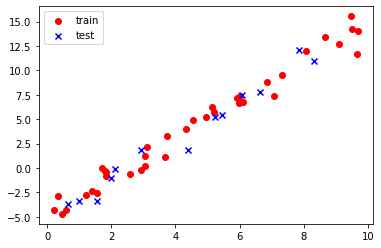

<Figure size 1440x1440 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.figure(figsize=(20,20))

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()
plt.show()

Now that we have `train` and `test` we should only ever pass `train` to the `fit` function


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

To find out how good the fit was, we can call the `score` method on the model. It is important here that we pass in our *test* data set as we expect that to provide an independent validation of the model.

In [8]:
model.score(test_X, test_y)

0.9676069631786152

A score of __1.0__ is a perfect match and anything less than that is less-well performing. A score of __0.97__ suggests we have a very good model.

### $\color{black}{Exercise}$

In [29]:
# load
from sklearn.datasets import load_diabetes

X, y = load_diabetes(as_frame=True, return_X_y=True)

In [34]:
# split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

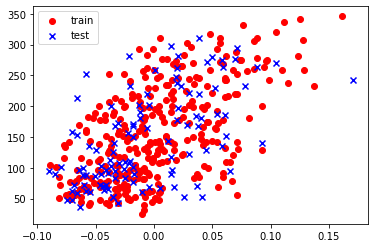

In [35]:
# plot
fig, ax = plt.subplots()

ax.scatter(train_X['bmi'], train_y, color='red', marker='o', label='train')
ax.scatter(test_X['bmi'], test_y, color='blue', marker='x', label='test')
ax.legend()

In [36]:
# fit
model.fit(train_X[['bmi']], train_y)

LinearRegression()

In [37]:
# score
model.score(test_X[['bmi']], test_y)

0.3172099449537781

In [38]:
# regression plot
x_fit = pd.DataFrame({'bmi': [X['bmi'].min(), X['bmi'].max()]})
y_pred = model.predict(x_fit)

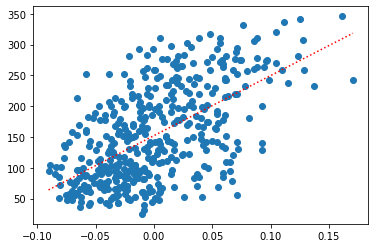

In [39]:
fig, ax = plt.subplots()

ax.scatter(X['bmi'], y)
ax.plot(x_fit['bmi'], y_pred, linestyle=':', color='red')
plt.show()